<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Airline Reporting Carrier On-Time Performance Dataset 





In [1]:
import piplite

await piplite.install(['nbformat', 'plotly'])

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

<ipython-input-2-1e897f6e951d>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##  Airline Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

Preview data, dataset metadata, and data glossary [here.](https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/data-preview/index.html)


# Read Data


In [3]:
# Read the airline data into pandas dataframe
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

airline_data =  pd.read_csv(text,
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
# Preview the first 5 lines of the loaded data 
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Shape of the data
airline_data.shape

(27000, 110)

In [6]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

In [7]:
# Get the shape of the trimmed data
data.shape

(500, 110)

It would be interesting if we visually  capture details such as

* Departure time changes with respect to airport distance.

* Average Flight Delay time over the months

* Comparing number of flights in each destination state

* Number of  flights per reporting airline

* Distrubution of arrival delay

* Proportion of distance group by month (month indicated by numbers)

* Hierarchical view in othe order of month and destination state holding value of number of flights


## 1. Scatter Plot


Let us use a scatter plot to represent departure time changes with respect to airport distance



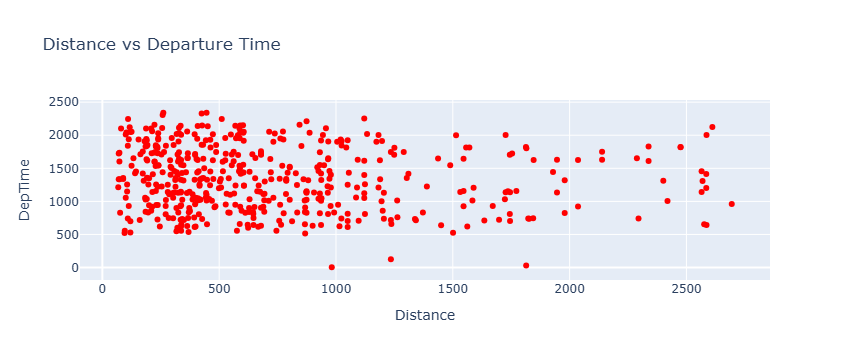

In [9]:
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()

#### Inferences

It can be inferred that there are more flights round the clock for shorter distances. However, for longer distance there are limited flights through the day.


## 2. Line Plot


Let us now use a line plot to extract average monthly arrival delay time and see how it changes over the year.



In [10]:
# Group the data by Month and compute average over arrival delay time.
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

In [11]:
# Display the data
line_data

,Month,ArrDelay
0,1,2.232558
1,2,2.687500
2,3,10.868421
3,4,6.229167
4,5,-0.279070
5,6,17.310345
6,7,5.088889
7,8,3.121951
8,9,9.081081
9,10,1.200000


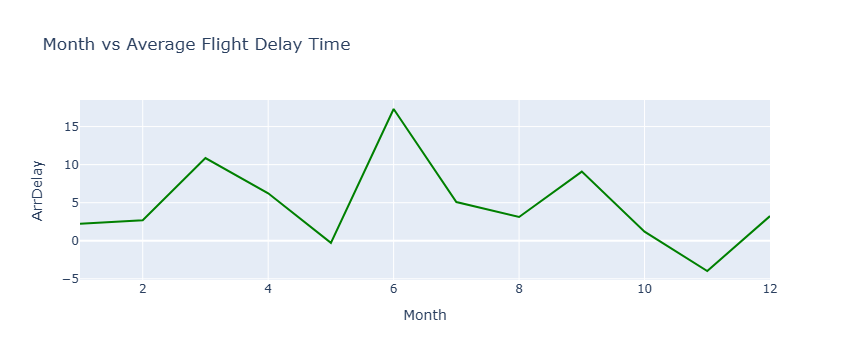

In [13]:
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
##Next we will create a line plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as lines with color of the marker as green
fig.add_trace(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
# Create line plot here
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

#### Inferences

It is found that in the month of June the average monthly delay time is the maximum


# plotly.express¶


## 3. Bar Chart



Let us use a bar chart to extract number of flights from a specific airline that goes to a destination



In [14]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()

In [15]:
# Display the data
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


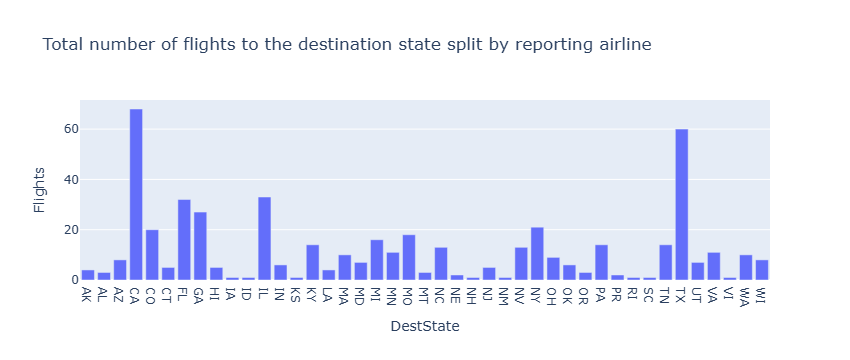

In [16]:

# Use plotly express bar chart function px.bar. Provide input data, x and y axis variable, and title of the chart.
# This will give total number of flights to the destination state.
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

#### Inferences

It is found that maximum flights are to destination state **CA** which is around 68 and there is only 1 flight to destination state **VT**


## 4. Histogram



Let us represent the distribution of arrival delay using a histogram


In [17]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

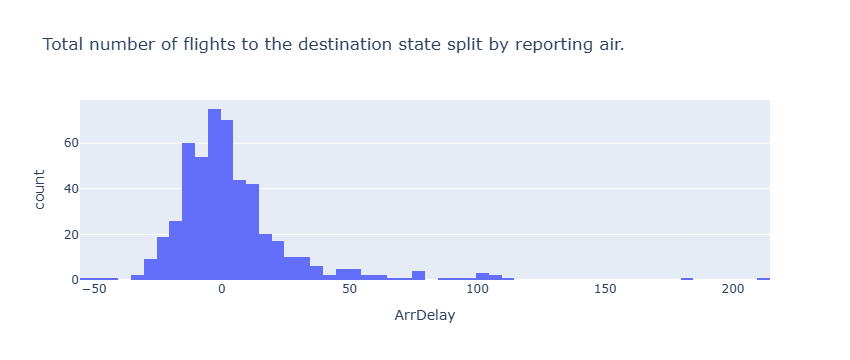

In [18]:

## Use plotly express histogram chart function px.histogram.Provide input data x to the histogram
fig = px.histogram(data, x="ArrDelay",title="Total number of flights to the destination state split by reporting air.")
fig.show()

#### Inferences

It is found that there is only max of 5 flights with an arrival delay of 50-54 minutes and around 17 flights with an arrival delay of 20-25 minutes


## 5. Bubble Chart


Let  use a bubble plot to represent number of flights as per reporting airline



In [19]:
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

In [20]:
bub_data

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0
5,DL,66.0
6,EA,4.0
7,EV,11.0
8,F9,4.0
9,FL,3.0


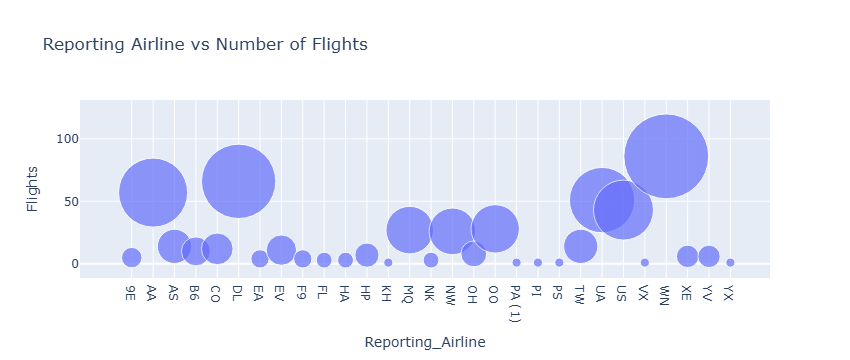

In [21]:
## Bubble chart using px.scatter function with x ,y and size variables defined.Title defined as Reporting Airline vs Number of Flights
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()


#### Inferences

It is found that the reporting airline **WN** has the highest number of flights which is around 86


## 6. Pie Chart


Let us represent the proportion of Flights by Distance Group (Flights indicated by numbers)



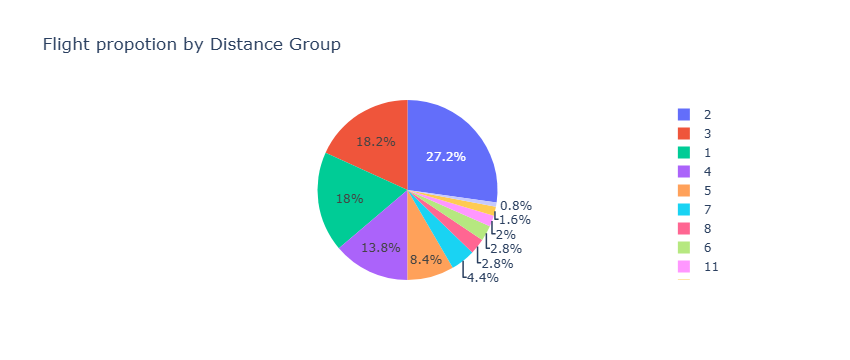

In [22]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Flights' feature is passed to it.
# labels for the sector are passed to the `names` parameter.
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Flight propotion by Distance Group')
fig.show()

#### Inferences

It is found that Distance group 2 has the highest flight proportion.


## 7. SunBurst Charts


Let us represent the hierarchical view in othe order of month and destination state holding value of number of flights


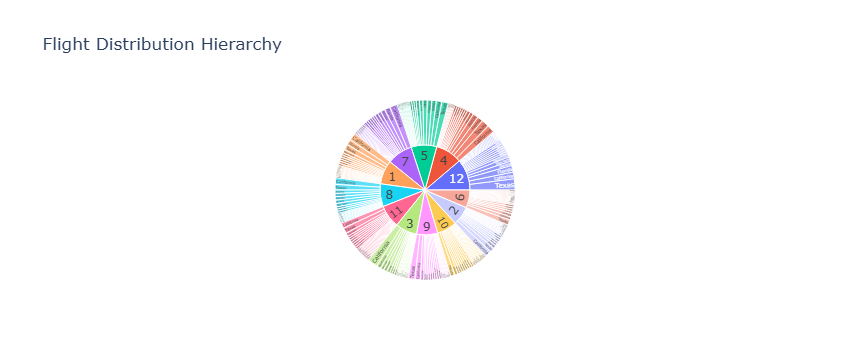

In [23]:
## Define path as Month and DestStateName and values as Flights.
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show()

#### Inferences

Here the  **Month** numbers present in the innermost concentric circle is the root and for each month we will check the **number of flights** for the different **destination states** under it.


## Summary of Visualizations and Findings
## Scatter Plot (Distance vs Departure Time)

The scatter plot visualizes the relationship between the distance of the flight and the departure time. The graph shows that there are more flights throughout the day for shorter distances, while longer distances have fewer flights during the day.
Inferences:

More flights occur at various times for shorter distances.
For longer flights, there is a limited number of flights spread across the day.
## Line Plot (Average Flight Delay Time by Month)

The line plot shows the variation of average flight delay over the months.
Inferences:

It is found that in the month of June, the average monthly delay time is the maximum.
## Bar Chart (Number of Flights per Reporting Airline to a Destination State)

This bar chart shows the total number of flights to various destination states for a particular airline.
Inferences:

California (CA) has the highest number of flights, around 68 flights.
Vermont (VT) has the least, with only 1 flight.
## Histogram (Arrival Delay Distribution)

The histogram visualizes the distribution of arrival delays for flights.
Inferences:

It is found that there are only a maximum of 5 flights with an arrival delay of 50-54 minutes and around 17 flights with an arrival delay of 20-25 minutes.
5. Bubble Chart (Month vs Number of Flights by Destination State)

The bubble chart visualizes the number of flights for each destination state by month, with months placed as concentric circles and the number of flights represented as bubbles.
Inferences:

It is found that the reporting airline WN has the highest number of flights, which is around 86.
##  Proportion of Distance Group by Month

This analysis breaks down the flight data into distance groups and displays how they are distributed across different months.
Inferences:

It is found that Distance group 2 has the highest flight proportion, 27.2%.
## Sunburst Chart (Month and Destination State)

A hierarchical sunburst chart visualizes the number of flights for each month and destination state.
Inferences:

Here, the month numbers present in the innermost concentric circle represent the root. For each month, we can check the number of flights for different destination states under it.
## Conclusion
Through these visualizations, several patterns and insights were uncovered, such as:

The relationship between distance and departure time.
Seasonal trends in flight delays.
State-based flight distribution and delays.
The variation in the number of flights per month and destination.



## Author(s)
[Saishruthi Swaminathan](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2022-01-01)

Lakshmi Holla


## Other Contributor(s)

Lavanya T S


## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>


## Completed by:
Qazi Fabia Hoq (as part of the Data Science Professional Certification by IBM)